In [1]:
# https://www.kaggle.com/tunguz/college-majors?select=women-stem.csv
# https://www.kaggle.com/hussainaliarif/largest-covid19-world-dataset?select=Covid-19-World-Dataset.csv

import pathlib

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
sns.set_style('whitegrid')

import statsmodels.formula.api as smf

from IPython.display import display

## Table of Contents
1. Basics of DataFrames 
2. Basic filtering
3. Sorting data
4. Basic DataFrame modifications
5. Combining Multiple DataFrames
6. Groupby & Pivot Tables
7. Change Data Types & Missing Data  
  
(future topics?)  
8. Basic Statistics  
9. Boolean Expressions?  
10. For loops and lists? (isin)  


## 1. Basics of DataFrames

**Read in a DataFrame from a csv file**

Sections 1-6: Post college graduation job data based on college major

In [2]:
df = pd.read_csv('all-ages.csv', low_memory=False)

Section 7: COVID statistics based on country

In [3]:
# Example using pathlib to check the validity of the file path
data_filepath = pathlib.Path('Covid-19-World-Dataset.csv')
if data_filepath.exists():
    data = pd.read_csv(data_filepath, low_memory=False)
else:
    print(f'{data_filepath} does not exist.')

**View DataFrame**

In [4]:
df

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
...,...,...,...,...,...,...,...,...,...,...,...
168,6211,HOSPITALITY MANAGEMENT,Business,200854,163393,122499,8862,0.051447,49000,33000,70000.0
169,6212,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,Business,156673,134478,118249,6186,0.043977,72000,50000,100000.0
170,6299,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,Business,102753,77471,61603,4308,0.052679,53000,36000,83000.0
171,6402,HISTORY,Humanities & Liberal Arts,712509,478416,354163,33725,0.065851,50000,35000,80000.0


**View "head" of DataFrame**

In [5]:
df.head(2)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0


**View "tail" of DataFrame**  
(default last 5)

In [6]:
df.tail()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
168,6211,HOSPITALITY MANAGEMENT,Business,200854,163393,122499,8862,0.051447,49000,33000,70000.0
169,6212,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,Business,156673,134478,118249,6186,0.043977,72000,50000,100000.0
170,6299,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,Business,102753,77471,61603,4308,0.052679,53000,36000,83000.0
171,6402,HISTORY,Humanities & Liberal Arts,712509,478416,354163,33725,0.065851,50000,35000,80000.0
172,6403,UNITED STATES HISTORY,Humanities & Liberal Arts,17746,11887,8204,943,0.073500,50000,39000,81000.0


**Edit DataFrame**

In [7]:
# Delete columns
example_df = df.head(10).drop(columns = ['Employed_full_time_year_round', 'P25th', 'P75th'])
example_df

,Major_code,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000
8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000
9,1302,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000


**Options for displaying DataFrame**

In [8]:
display(example_df)

,Major_code,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000
8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000
9,1302,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000


**Data length & shape**  
(rows, columns)

In [9]:
len(df)

173

In [10]:
df.shape

(173, 11)

## 2. Basic Filtering

**Read a specific column**

In [11]:
df['Major']

0                                  GENERAL AGRICULTURE
1                AGRICULTURE PRODUCTION AND MANAGEMENT
2                               AGRICULTURAL ECONOMICS
3                                      ANIMAL SCIENCES
4                                         FOOD SCIENCE
                            ...                       
168                             HOSPITALITY MANAGEMENT
169      MANAGEMENT INFORMATION SYSTEMS AND STATISTICS
170    MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION
171                                            HISTORY
172                              UNITED STATES HISTORY
Name: Major, Length: 173, dtype: object

**Read multiple columns**

In [12]:
df[['Major','Median']]

,Major,Median
0,GENERAL AGRICULTURE,50000
1,AGRICULTURE PRODUCTION AND MANAGEMENT,54000
2,AGRICULTURAL ECONOMICS,63000
3,ANIMAL SCIENCES,46000
4,FOOD SCIENCE,62000
...,...,...
168,HOSPITALITY MANAGEMENT,49000
169,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,72000
170,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,53000
171,HISTORY,50000


**Read a specific row**   
(by index location)

In [13]:
df.iloc[1]
df.iloc[1:4] #ex-clusive (will read up to index 4 but not including index 4)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0


**Read a cell in a specific location**  
(row, column)

In [14]:
df.iloc[0,1]

'GENERAL AGRICULTURE'

**Find all instances of a specific value in a column**  
**IMPORTANT**

In [15]:
df.loc[df['Major_category'] == 'Business']

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
158,6200,GENERAL BUSINESS,Business,2148712,1580978,1304646,85626,0.051378,60000,40000,95000.0
159,6201,ACCOUNTING,Business,1779219,1335825,1095027,75379,0.053415,65000,42500,100000.0
160,6202,ACTUARIAL SCIENCE,Business,9763,7846,6880,466,0.056064,72000,53000,115000.0
161,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,3123510,2354398,1939384,147261,0.058865,58000,39500,86000.0
162,6204,OPERATIONS LOGISTICS AND E-COMMERCE,Business,57200,47341,41104,2141,0.043268,65000,45000,90000.0
163,6205,BUSINESS ECONOMICS,Business,75547,57983,48471,3816,0.061749,65000,45000,100000.0
164,6206,MARKETING AND MARKETING RESEARCH,Business,1114624,890125,704912,51839,0.055033,56000,38500,90000.0
165,6207,FINANCE,Business,816548,670681,561073,34166,0.048473,65000,45000,100000.0
166,6209,HUMAN RESOURCES AND PERSONNEL MANAGEMENT,Business,187274,142879,116466,9241,0.060748,54000,38000,80000.0
167,6210,INTERNATIONAL BUSINESS,Business,86064,66453,51012,5106,0.071354,54000,38600,80000.0


**Find all instances NOT of a specific value in a column**  
by using ~

In [16]:
# View the first three rows of the dataframe where the major category is NOT Agriculture
df.loc[~(df['Major_category'] == 'Agriculture & Natural Resources')].head(3)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000.0
11,1401,ARCHITECTURE,Engineering,294692,216770,163020,20394,0.085991,63000,40400,93500.0
12,1501,AREA ETHNIC AND CIVILIZATION STUDIES,Humanities & Liberal Arts,103740,75798,50530,5525,0.067939,46000,32000,71000.0


**Find all instances of a specific string in a column**  
Case Sensitive

In [17]:
df.loc[df['Major'].str.contains('MATH')]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
29,2305,MATHEMATICS TEACHER EDUCATION,Education,68808,47203,29494,1610,0.032983,43000,34000,60000.0
90,3700,MATHEMATICS,Computers & Mathematics,432806,280902,209838,15701,0.052936,66000,42000,100000.0
91,3701,APPLIED MATHEMATICS,Computers & Mathematics,19112,15136,12109,892,0.055653,70000,47000,106000.0
97,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,5039,150,0.024900,92000,53000,136000.0


Ignore Upper/Lower case

In [18]:
df.loc[df['Major'].str.contains('mAtH', case = False)]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
29,2305,MATHEMATICS TEACHER EDUCATION,Education,68808,47203,29494,1610,0.032983,43000,34000,60000.0
90,3700,MATHEMATICS,Computers & Mathematics,432806,280902,209838,15701,0.052936,66000,42000,100000.0
91,3701,APPLIED MATHEMATICS,Computers & Mathematics,19112,15136,12109,892,0.055653,70000,47000,106000.0
97,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,5039,150,0.024900,92000,53000,136000.0


**Find all instances of multiple strings in a column**  
| = OR (either, union)  
& = AND (must contain both, intersection)

In [19]:
import re
df.loc[df['Major'].str.contains('MATH|COMPUTER', flags = re.I, regex = True)]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
18,2100,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,253782,218248,189950,11945,0.051891,65000,45000,90000.0
19,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,29317,22828,18747,2265,0.090264,60000,40000,85000.0
20,2102,COMPUTER SCIENCE,Computers & Mathematics,783292,656372,561052,34196,0.049519,78000,51000,105000.0
22,2106,COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,Computers & Mathematics,39362,32366,28156,2626,0.075046,55000,40000,80000.0
23,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,Computers & Mathematics,51771,44071,35954,2748,0.058694,55000,36000,80000.0
29,2305,MATHEMATICS TEACHER EDUCATION,Education,68808,47203,29494,1610,0.032983,43000,34000,60000.0
32,2308,SCIENCE AND COMPUTER TEACHER EDUCATION,Education,56477,36224,24817,1596,0.042200,46000,35000,61000.0
47,2407,COMPUTER ENGINEERING,Engineering,154160,128742,111025,7456,0.054744,80000,60000,107000.0
90,3700,MATHEMATICS,Computers & Mathematics,432806,280902,209838,15701,0.052936,66000,42000,100000.0
91,3701,APPLIED MATHEMATICS,Computers & Mathematics,19112,15136,12109,892,0.055653,70000,47000,106000.0


**Conditional filters**  
easy way to combine multiple conditions

In [20]:
my_condition = (df['Median'] >= 80000) & (df['Unemployment_rate'] < 0.03)
df[my_condition]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
51,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,3350,0,0.0000,85000,55000,125000.0
97,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,5039,150,0.0249,92000,53000,136000.0


## 3. Sorting Data

**Sort DataFrame by values in a column (defaults to ascending)**

In [21]:
df.sort_values('Total').head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
27,2303,SCHOOL STUDENT COUNSELING,Education,2396,1492,1093,169,0.101746,41000,33200,50000.0
26,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,4037,3113,2468,0,0.000000,58000,44750,79000.0
93,3801,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,4315,1650,1708,187,0.101796,64000,39750,90000.0
104,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,4700,3400,2447,320,0.086022,80000,40000,106000.0
85,3607,PHARMACOLOGY,Biology & Life Science,5015,3481,2579,57,0.016111,60000,35000,105000.0


**Sort DataFrame by values in a column**  
(using *descending* unemployment rates in this example)

In [22]:
df.sort_values('Unemployment_rate', ascending = False).head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
146,6099,MISCELLANEOUS FINE ARTS,Arts,8511,6431,3802,1190,0.156147,45000,30000,60000.0
116,5202,CLINICAL PSYCHOLOGY,Psychology & Social Work,7638,5128,3297,587,0.102712,45000,26100,62000.0
93,3801,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,4315,1650,1708,187,0.101796,64000,39750,90000.0
27,2303,SCHOOL STUDENT COUNSELING,Education,2396,1492,1093,169,0.101746,41000,33200,50000.0
77,3501,LIBRARY SCIENCE,Education,16193,7091,4330,743,0.094843,40000,30000,55000.0


**Sort by multiple columns**  
**IMPORTANT**

In [23]:
# sort by Major_category first, then by Medians within each Major_category
df.sort_values(['Major_category', 'Median'], ascending = [0,0]).head(10)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
127,5501,ECONOMICS,Social Science,757616,535446,430580,34974,0.061313,69000,42000,110000.0
132,5506,POLITICAL SCIENCE AND GOVERNMENT,Social Science,748956,541630,421761,40376,0.069374,58000,38000,90000.0
131,5505,INTERNATIONAL RELATIONS,Social Science,77371,56564,42091,4278,0.070313,55000,40000,89000.0
130,5504,GEOGRAPHY,Social Science,115423,83671,63070,6202,0.069008,54000,38300,78000.0
134,5599,MISCELLANEOUS SOCIAL SCIENCES,Social Science,15882,12307,9444,708,0.054399,52000,40000,80000.0
126,5500,GENERAL SOCIAL SCIENCES,Social Science,127363,80165,57036,6132,0.071057,50000,35000,75000.0
129,5503,CRIMINOLOGY,Social Science,75085,59534,48763,4106,0.064519,49000,35000,72000.0
133,5507,SOCIOLOGY,Social Science,674558,459174,336515,32344,0.065804,47000,33000,70000.0
99,4007,INTERDISCIPLINARY SOCIAL SCIENCES,Social Science,61871,43312,31078,3030,0.065383,45000,33000,67000.0
118,5205,INDUSTRIAL AND ORGANIZATIONAL PSYCHOLOGY,Psychology & Social Work,17969,11878,8631,1084,0.083629,62000,40000,84000.0


## 4. Basic DataFrame Modifications

**Create modified DataFrame**

Simple example  
Implements dataframe sorting methods from section 3

In [24]:
# Only include majors whose median salary is greater than $95000 per year
# Then sort those majors from highest salary to lowest
df_mod = df.loc[df['Median'] > 95000].sort_values(by = 'Median', ascending = False)
df_mod

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
59,2419,PETROLEUM ENGINEERING,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0
154,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,89234,4414,0.034358,106000,78000,125000.0
57,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,9226,449,0.040309,97000,60000,125000.0
55,2415,METALLURGICAL ENGINEERING,Engineering,12818,6939,5462,326,0.044873,96000,65000,123000.0


More advanced example implementing the regex library  

In [25]:
import re
# Only include columns whose major contains the words science, tech, engineering, or math
df_change = df.loc[df['Major'].str.contains('SCIENCE|TECH|ENGINEERING|MATH', flags = re.I, regex = True)]
df_change.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.031791,50000,35000,75000.0
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.050867,63000,39400,88000.0
8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000.0


**Reset index of modified DataFrame**   
In this example, the old index values are dropped

In [26]:
df_change = df_change.reset_index(drop = True)
df_change.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
1,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
2,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.031791,50000,35000,75000.0
3,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.050867,63000,39400,88000.0
4,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000.0


**Add a new column** 

In [27]:
df_change['Interquartile Range'] = (df_change['P75th'] - df_change['P25th'])
df_change.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Interquartile Range
0,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0,42000.0
1,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0,51500.0
2,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.031791,50000,35000,75000.0,40000.0
3,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.050867,63000,39400,88000.0,48600.0
4,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000.0,37000.0


**View a subset of columns**

In [28]:
df_change[['Major', 'Interquartile Range']].head()

,Major,Interquartile Range
0,ANIMAL SCIENCES,42000.0
1,FOOD SCIENCE,51500.0
2,PLANT SCIENCE AND AGRONOMY,40000.0
3,SOIL SCIENCE,48600.0
4,ENVIRONMENTAL SCIENCE,37000.0


**Rename a column**

In [29]:
df_change = df_change.rename(columns = {'Interquartile Range' : 'Middle 50%'})
df_change[['Major', 'Middle 50%']].head()

,Major,Middle 50%
0,ANIMAL SCIENCES,42000.0
1,FOOD SCIENCE,51500.0
2,PLANT SCIENCE AND AGRONOMY,40000.0
3,SOIL SCIENCE,48600.0
4,ENVIRONMENTAL SCIENCE,37000.0


## 5. Combining Multiple DataFrames

**Merge two DataFrames together**  
Can be done easily if the rows in both dataframes have similar characteristics

In [30]:
# Comparison between undergrads and grad students
data_filepath = pathlib.Path('grad-students.csv')
if data_filepath.exists():
    df_education_level = pd.read_csv(data_filepath, low_memory=False)
df_grad = df.merge(df_education_level)
df_grad.head(3)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0,44306,764,28930,23024,874,0.029325,68000.0,45000,104000.0,123984,86631,72409,2352,0.026432,50000.0,34000,80000.0,0.263272,0.360000
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0,17488,386,13104,11207,473,0.034838,67000.0,41600,100000.0,89169,71781,61335,1869,0.025377,55000.0,38000,80000.0,0.163965,0.218182
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0,14800,305,10592,8768,216,0.019985,80000.0,53000,120000.0,33049,25557,22496,734,0.027918,63000.0,40000,99000.0,0.309306,0.269841


## 6. Groupby & Pivot Tables (Aggregate Statistics)

### **groupby**  
**EXTREMELY IMPORTANT**

**Evaluate the number of occurences of all unique values in a column in all other columns in Dataframe**

In [31]:
agg_df = df.groupby(['Major_category']).count()
agg_df.head()

,Major_code,Major,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
Major_category,,,,,,,,,,
Agriculture & Natural Resources,10,10,10,10,10,10,10,10,10,10
Arts,8,8,8,8,8,8,8,8,8,8
Biology & Life Science,14,14,14,14,14,14,14,14,14,14
Business,13,13,13,13,13,13,13,13,13,13
Communications & Journalism,4,4,4,4,4,4,4,4,4,4


**Group DataFrame by Major_category, find the sum of employed individuals for each Major_category**  
By default, df.groupby returns a pandas Series.  
To return a DataFrame, set as_index = False.


In [32]:
agg_df = df.groupby(['Major_category'], as_index = False)['Employed'].sum()
agg_df.sort_values('Employed', ascending = False).reset_index()

,index,Major_category,Employed
0,3,Business,7529851
1,6,Education,2833199
2,7,Engineering,2621966
3,9,Humanities & Liberal Arts,2499175
4,8,Health,2192692
5,15,Social Science,1871803
6,4,Communications & Journalism,1423041
7,14,Psychology & Social Work,1411983
8,5,Computers & Mathematics,1410607
9,1,Arts,1308695


Alternative method to return a pandas DataFrame

In [33]:
agg_df = df.groupby(['Major_category'])['Employed'].sum()
agg_df = pd.DataFrame(agg_df)

**Multi-Level Directory**: multiple columns grouped on

In [34]:
agg_df = df.groupby(['Major_category', 'Major'])['Median'].sum()
agg_df

Major_category                   Major                                
Agriculture & Natural Resources  AGRICULTURAL ECONOMICS                   63000
                                 AGRICULTURE PRODUCTION AND MANAGEMENT    54000
                                 ANIMAL SCIENCES                          46000
                                 FOOD SCIENCE                             62000
                                 FORESTRY                                 58000
                                                                          ...  
Social Science                   INTERDISCIPLINARY SOCIAL SCIENCES        45000
                                 INTERNATIONAL RELATIONS                  55000
                                 MISCELLANEOUS SOCIAL SCIENCES            52000
                                 POLITICAL SCIENCE AND GOVERNMENT         58000
                                 SOCIOLOGY                                47000
Name: Median, Length: 173, dtype: int64

**Find Average by group**  
**USEFUL**  
**WITH MATPLOTLIB EXAMPLE SHOWING APPLICATION OF GROUPBY**

In [35]:
agg_df = df.groupby(['Major_category'], as_index = False)['Median'].mean()
agg_df

,Major_category,Median
0,Agriculture & Natural Resources,55000.000000
1,Arts,43525.000000
2,Biology & Life Science,50821.428571
3,Business,60615.384615
4,Communications & Journalism,49500.000000
5,Computers & Mathematics,66272.727273
6,Education,43831.250000
7,Engineering,77758.620690
8,Health,56458.333333
9,Humanities & Liberal Arts,46080.000000


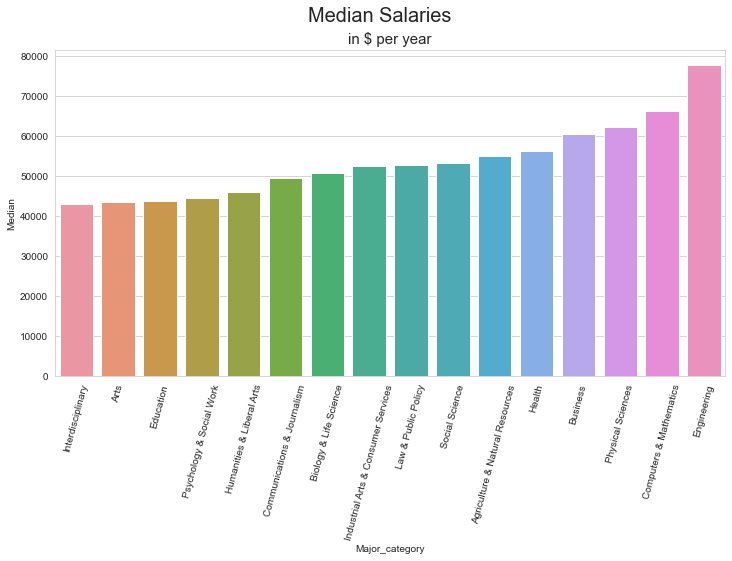

In [36]:
# There are ways to create this plot using only matplotlib, but for visualization purposes I also used a additional library called Seaborn

fig, ax = plt.subplots(1, 1, figsize=(12,6))

# HOW TO SAVE THE RESULTING FIGURE AS A PDF
plot_filename = 'Major_Category_Median_Salary'

plot_directory = pathlib.Path('plots')
plot_directory.mkdir(exist_ok = True)

plot_filepath = pathlib.Path(
    plot_directory,
    f'{plot_filename}.pdf',
)

# Create barplot using seaborn
sns.barplot(
    x = 'Major_category',
    y = 'Median',
    data = agg_df.sort_values('Median'),
    label = 'Median Salaries',
)

plt.xticks(rotation = 75)
plt.suptitle('Median Salaries', fontsize = 20)
plt.title('in $ per year', fontsize = 15)

# produce plot
plt.savefig(plot_filepath, bbox_inches='tight')

plt.show()

**Specific Aggregates**

In [37]:
# Pass in a dictionary (also np.median, np.mean)
df.groupby(['Major_category']).aggregate({'P25th': np.min, 'P75th': np.max})

,P25th,P75th
Major_category,,
Agriculture & Natural Resources,30000,98000.0
Arts,24900,70000.0
Biology & Life Science,28000,105000.0
Business,33000,115000.0
Communications & Journalism,32000,80000.0
Computers & Mathematics,34500,136000.0
Education,27000,79000.0
Engineering,40000,210000.0
Health,30000,125000.0


**Merging DataFrames with groupby**

In [38]:
comp = df.merge(df_education_level).groupby(['Major_category']).aggregate({'Nongrad_median': np.median, 'Grad_median': np.median})
comp['Difference'] = comp['Grad_median'] - comp['Nongrad_median']
comp

,Nongrad_median,Grad_median,Difference
Major_category,,,
Agriculture & Natural Resources,55000.0,69000.0,14000.0
Arts,46000.0,57500.0,11500.0
Biology & Life Science,55000.0,85000.0,30000.0
Business,60000.0,85000.0,25000.0
Communications & Journalism,51500.0,62500.0,11000.0
Computers & Mathematics,68000.0,85000.0,17000.0
Education,44000.0,58500.0,14500.0
Engineering,78000.0,98000.0,20000.0
Health,52000.0,73000.0,21000.0


**Find rows in an aggregated DataFrame**  
(in this case, indices are Major Categories)

In [39]:
comp[comp.index.str.contains('Science')]

,Nongrad_median,Grad_median,Difference
Major_category,,,
Biology & Life Science,55000.0,85000.0,30000.0
Physical Sciences,60000.0,88000.0,28000.0
Social Science,54000.0,73000.0,19000.0


### **Pivot Tables**  
(ignore for now)

In [40]:
# Using COVID dataset, combine new case numbers from every country in each continent
data.groupby(['continent'], as_index = False)['new_cases'].count()

,continent,new_cases
0,Africa,25340
1,Asia,23160
2,Europe,22581
3,North America,10970
4,Oceania,3109
5,South America,5765


## 7. Change Data Types

**Dates**

In [41]:
# can also do freq = 'W-SUN' (weekly frequency starting on Sundays)

In [42]:
data['date'] = pd.to_datetime(data['date'])
data['Case Month'] = data['date'].dt.to_period(freq='M')

**Example of Null Values**   
Null values frequently show up in cells where no data is found that SHOULD be 0, but due to their data type, calculations with these cells cannot be completed until their data type is changed

In [43]:
na_covid = data.loc[data['continent'] == 'Oceania']

# average new cases per day in each month
avg = na_covid.pivot_table(['new_cases'], columns = ['location'], index = ['Case Month'], aggfunc = 'mean')
avg

new_cases                                         \
location     Australia        Fiji  Kiribati Marshall Islands   
Case Month                                                      
2020-01       1.500000         NaN       NaN              NaN   
2020-02       0.551724         NaN       NaN              NaN   
2020-03     146.258065    0.384615       NaN              NaN   
2020-04      73.566667    0.433333       NaN              NaN   
2020-05      14.064516    0.000000       NaN              NaN   
2020-06      23.933333    0.000000       NaN              NaN   
2020-07     301.935484    0.290323       NaN              NaN   
2020-08     275.451613    0.032258       NaN              NaN   
2020-09      42.566667    0.133333       NaN              NaN   
2020-10      16.096774    0.064516       NaN         0.500000   
2020-11      10.566667    0.266667       NaN         0.066667   
2020-12      16.548387    0.225806       NaN         0.000000   
2021-01      12.677419    0.193548       NaN         0.000000   
2021-02       5.714286    0.142857       NaN         0.000000   
2021-03      11.096774    0.258065       NaN         0.000000   
2021-04      16.300000    1.666667       NaN         0.000000   
2021-05       9.903226   10.354839  0.142857         0.000000   
2021-06      16.689655  127.793103  0.000000         0.000000   

                                                                        \
location   Micronesia (country) New Zealand Papua New Guinea     Samoa   
Case Month                                                               
2020-01                     NaN         NaN              NaN       NaN   
2020-02                     NaN    0.500000              NaN       NaN   
2020-03                     NaN   20.838710         0.083333       NaN   
2020-04                     NaN   27.733333         0.233333       NaN   
2020-05                     NaN    0.806452         0.000000       NaN   
2020-06                     NaN    0.800000         0.100000       NaN   
2020-07                     NaN    1.096774         1.967742       NaN   
2020-08                     NaN    6.129032        12.483871       NaN   
2020-09                     NaN    3.200000         2.500000       NaN   
2020-10                     NaN    3.580645         1.774194       NaN   
2020-11                     NaN    3.333333         2.233333  0.153846   
2020-12                     NaN    3.322581         4.000000  0.000000   
2021-01                0.090909    4.580645         2.290323  0.000000   
2021-02                0.000000    2.642857        15.142857  0.035714   
2021-03                0.000000    3.967742       152.129032  0.000000   
2021-04                0.000000    3.733333       166.866667  0.000000   
2021-05                0.000000    1.967742       158.483871  0.000000   
2021-06                0.000000    2.379310        40.965517  0.000000   

                                      
location   Solomon Islands   Vanuatu  
Case Month                            
2020-01                NaN       NaN  
2020-02                NaN       NaN  
2020-03                NaN       NaN  
2020-04                NaN       NaN  
2020-05                NaN       NaN  
2020-06                NaN       NaN  
2020-07                NaN       NaN  
2020-08                NaN       NaN  
2020-09                NaN       NaN  
2020-10           0.400000       NaN  
2020-11           0.300000  0.047619  
2020-12           0.000000  0.000000  
2021-01           0.000000  0.000000  
2021-02           0.035714  0.000000  
2021-03           0.032258  0.064516  
2021-04           0.033333  0.033333  
2021-05           0.000000  0.000000  
2021-06           0.000000  0.000000

Fill in null values with 0

In [44]:
avg = avg.fillna(0)
avg

new_cases                                         \
location     Australia        Fiji  Kiribati Marshall Islands   
Case Month                                                      
2020-01       1.500000    0.000000  0.000000         0.000000   
2020-02       0.551724    0.000000  0.000000         0.000000   
2020-03     146.258065    0.384615  0.000000         0.000000   
2020-04      73.566667    0.433333  0.000000         0.000000   
2020-05      14.064516    0.000000  0.000000         0.000000   
2020-06      23.933333    0.000000  0.000000         0.000000   
2020-07     301.935484    0.290323  0.000000         0.000000   
2020-08     275.451613    0.032258  0.000000         0.000000   
2020-09      42.566667    0.133333  0.000000         0.000000   
2020-10      16.096774    0.064516  0.000000         0.500000   
2020-11      10.566667    0.266667  0.000000         0.066667   
2020-12      16.548387    0.225806  0.000000         0.000000   
2021-01      12.677419    0.193548  0.000000         0.000000   
2021-02       5.714286    0.142857  0.000000         0.000000   
2021-03      11.096774    0.258065  0.000000         0.000000   
2021-04      16.300000    1.666667  0.000000         0.000000   
2021-05       9.903226   10.354839  0.142857         0.000000   
2021-06      16.689655  127.793103  0.000000         0.000000   

                                                                        \
location   Micronesia (country) New Zealand Papua New Guinea     Samoa   
Case Month                                                               
2020-01                0.000000    0.000000         0.000000  0.000000   
2020-02                0.000000    0.500000         0.000000  0.000000   
2020-03                0.000000   20.838710         0.083333  0.000000   
2020-04                0.000000   27.733333         0.233333  0.000000   
2020-05                0.000000    0.806452         0.000000  0.000000   
2020-06                0.000000    0.800000         0.100000  0.000000   
2020-07                0.000000    1.096774         1.967742  0.000000   
2020-08                0.000000    6.129032        12.483871  0.000000   
2020-09                0.000000    3.200000         2.500000  0.000000   
2020-10                0.000000    3.580645         1.774194  0.000000   
2020-11                0.000000    3.333333         2.233333  0.153846   
2020-12                0.000000    3.322581         4.000000  0.000000   
2021-01                0.090909    4.580645         2.290323  0.000000   
2021-02                0.000000    2.642857        15.142857  0.035714   
2021-03                0.000000    3.967742       152.129032  0.000000   
2021-04                0.000000    3.733333       166.866667  0.000000   
2021-05                0.000000    1.967742       158.483871  0.000000   
2021-06                0.000000    2.379310        40.965517  0.000000   

                                      
location   Solomon Islands   Vanuatu  
Case Month                            
2020-01           0.000000  0.000000  
2020-02           0.000000  0.000000  
2020-03           0.000000  0.000000  
2020-04           0.000000  0.000000  
2020-05           0.000000  0.000000  
2020-06           0.000000  0.000000  
2020-07           0.000000  0.000000  
2020-08           0.000000  0.000000  
2020-09           0.000000  0.000000  
2020-10           0.400000  0.000000  
2020-11           0.300000  0.047619  
2020-12           0.000000  0.000000  
2021-01           0.000000  0.000000  
2021-02           0.035714  0.000000  
2021-03           0.032258  0.064516  
2021-04           0.033333  0.033333  
2021-05           0.000000  0.000000  
2021-06           0.000000  0.000000

**Float to Integer**  
Always rounds down!

In [45]:
avg.astype(int)

new_cases                                                      \
location   Australia Fiji Kiribati Marshall Islands Micronesia (country)   
Case Month                                                                 
2020-01            1    0        0                0                    0   
2020-02            0    0        0                0                    0   
2020-03          146    0        0                0                    0   
2020-04           73    0        0                0                    0   
2020-05           14    0        0                0                    0   
2020-06           23    0        0                0                    0   
2020-07          301    0        0                0                    0   
2020-08          275    0        0                0                    0   
2020-09           42    0        0                0                    0   
2020-10           16    0        0                0                    0   
2020-11           10    0        0                0                    0   
2020-12           16    0        0                0                    0   
2021-01           12    0        0                0                    0   
2021-02            5    0        0                0                    0   
2021-03           11    0        0                0                    0   
2021-04           16    1        0                0                    0   
2021-05            9   10        0                0                    0   
2021-06           16  127        0                0                    0   

                                                                       
location   New Zealand Papua New Guinea Samoa Solomon Islands Vanuatu  
Case Month                                                             
2020-01              0                0     0               0       0  
2020-02              0                0     0               0       0  
2020-03             20                0     0               0       0  
2020-04             27                0     0               0       0  
2020-05              0                0     0               0       0  
2020-06              0                0     0               0       0  
2020-07              1                1     0               0       0  
2020-08              6               12     0               0       0  
2020-09              3                2     0               0       0  
2020-10              3                1     0               0       0  
2020-11              3                2     0               0       0  
2020-12              3                4     0               0       0  
2021-01              4                2     0               0       0  
2021-02              2               15     0               0       0  
2021-03              3              152     0               0       0  
2021-04              3              166     0               0       0  
2021-05              1              158     0               0       0  
2021-06              2               40     0               0       0

Round to x decimal places, then convert to int to ensure correct rounding

In [46]:
avg.round(0).astype(int)

new_cases                                                      \
location   Australia Fiji Kiribati Marshall Islands Micronesia (country)   
Case Month                                                                 
2020-01            2    0        0                0                    0   
2020-02            1    0        0                0                    0   
2020-03          146    0        0                0                    0   
2020-04           74    0        0                0                    0   
2020-05           14    0        0                0                    0   
2020-06           24    0        0                0                    0   
2020-07          302    0        0                0                    0   
2020-08          275    0        0                0                    0   
2020-09           43    0        0                0                    0   
2020-10           16    0        0                0                    0   
2020-11           11    0        0                0                    0   
2020-12           17    0        0                0                    0   
2021-01           13    0        0                0                    0   
2021-02            6    0        0                0                    0   
2021-03           11    0        0                0                    0   
2021-04           16    2        0                0                    0   
2021-05           10   10        0                0                    0   
2021-06           17  128        0                0                    0   

                                                                       
location   New Zealand Papua New Guinea Samoa Solomon Islands Vanuatu  
Case Month                                                             
2020-01              0                0     0               0       0  
2020-02              0                0     0               0       0  
2020-03             21                0     0               0       0  
2020-04             28                0     0               0       0  
2020-05              1                0     0               0       0  
2020-06              1                0     0               0       0  
2020-07              1                2     0               0       0  
2020-08              6               12     0               0       0  
2020-09              3                2     0               0       0  
2020-10              4                2     0               0       0  
2020-11              3                2     0               0       0  
2020-12              3                4     0               0       0  
2021-01              5                2     0               0       0  
2021-02              3               15     0               0       0  
2021-03              4              152     0               0       0  
2021-04              4              167     0               0       0  
2021-05              2              158     0               0       0  
2021-06              2               41     0               0       0